In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
x = np.arange(0,10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

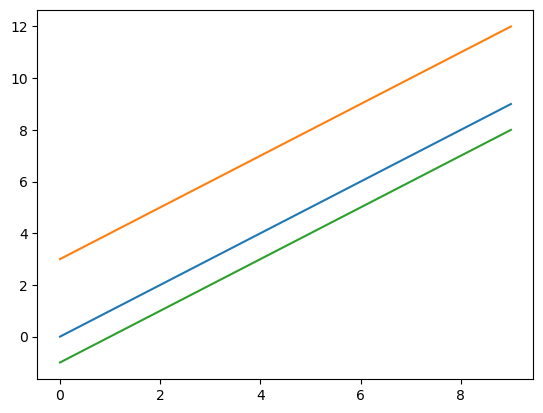

In [99]:
y = 0 + 1 * x
y
y2 = 3 + 1 * x 
y2
y3 = -1 + 1 * x
y3
#here we are changing the y-intercept (b0), which controls the height of the line

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

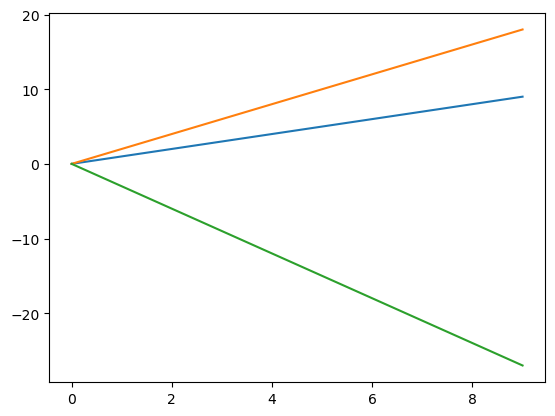

In [100]:
y = 0 + x 
y2 = 0 + 2*x 
y3 = 0 + -3*x
#here we are changing the gradient (aka coefficient or b1), which controls the slope of the line

plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

In [101]:
reg_data = pd.read_csv('regression_data.csv')
reg_data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2000.0,458,453,495,469.0,19217,13.511111,38.0
1,817.0,213,256,240,236.0,8518,12.222222,10.0
2,1866.0,405,423,394,407.0,15709,23.857143,37.0
3,1174.0,268,282,298,283.0,10427,10.400000,12.0
4,3048.0,470,557,562,530.0,31631,8.222222,15.0


In [102]:
reg_data.describe().T

,count,mean,std,min,25%,50%,75%,max
HV1,1000.0,1600.019000,1110.065447,150.00000,921.0,1246.500000,1870.00,7077.000000
IC1,1000.0,348.366000,167.285183,0.00000,237.0,321.000000,416.25,1500.000000
IC2,1000.0,395.848000,184.705254,0.00000,278.0,365.000000,469.00,1500.000000
IC3,1000.0,395.767000,165.794211,0.00000,281.0,368.000000,468.00,1311.000000
IC4,1000.0,379.984000,170.241252,0.00000,267.0,352.500000,449.75,1437.000000
IC5,1000.0,16177.241000,9641.700538,0.00000,10834.5,14000.000000,18639.00,100528.000000
AVGGIFT,1000.0,11.828555,6.685000,2.26087,7.0,10.333333,15.00,51.428571
TARGET_D,1000.0,14.980700,8.858956,2.00000,10.0,14.000000,20.00,50.000000


In [103]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

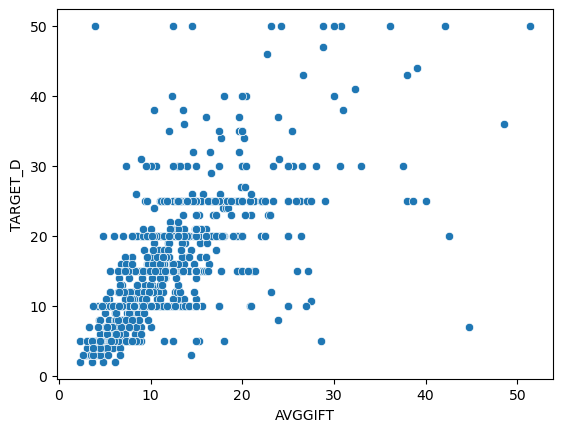

In [104]:
#let's pick the AVGGIFT variable as the one we think is the most explanatory
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [105]:
reg_data['TARGET_D'].corr(reg_data['AVGGIFT'])

0.7213639344820856

In [106]:
y = reg_data['TARGET_D']
X = reg_data[['AVGGIFT']]

In [107]:
type(y)

pandas.core.series.Series

In [108]:
# to perform the linear regression we'll use the sklearn implementation of linear regression
# we will use sklearn a lot

# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet

lm = linear_model.LinearRegression()

In [109]:
%%time
# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

lm.fit(X,y)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

b0 =  3.673182698423581
b1 =  [0.95595086]
CPU times: total: 0 ns
Wall time: 51.6 ms


In [110]:
pred = 3.67 + AVGGIFT*0.95

NameError: name 'AVGGIFT' is not defined

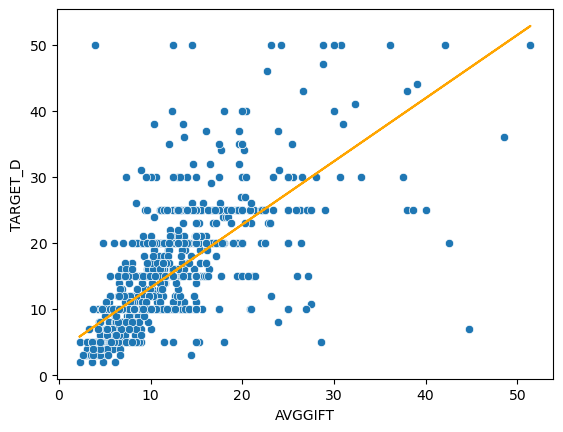

In [111]:
#let's visualize this result
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line, c = 'orange')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [112]:
#we can use this model to predict new or unseen datapoints
lm.predict([[10],[20],[30],[50],[100]])
#what does this mean

C:\Users\harri\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.23269127, 22.79219984, 32.3517084 , 51.47072554, 99.26826838])

In [113]:
#the score is not great, but we have not performed any data preparation yet
print("R2-score is ", lm.score(X,y))

y_pred = lm.predict(X)
print("mean squared error (MSE) is ", mean_squared_error(y_pred,y))
mean_squared_error(y_pred,y)

R2-score is  0.5203659259714741
mean squared error (MSE) is  37.60456685082154


37.60456685082154

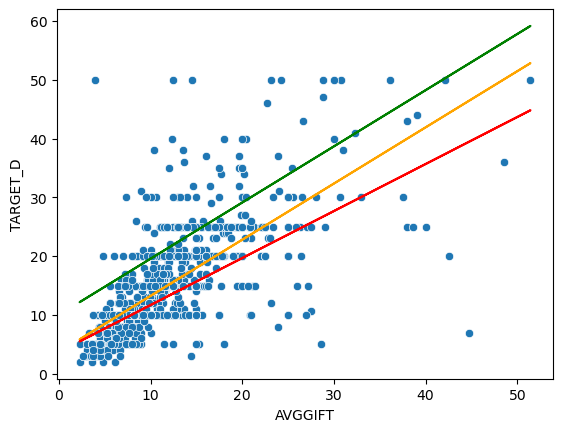

In [114]:
#any other line would have a worse result
regression_line = lm.intercept_ + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line, c = 'orange')
regression_line_2 = lm.intercept_ + 0.8*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line_2, c = 'red')
regression_line_3 = 10 + lm.coef_[0]*reg_data['AVGGIFT']
plt.plot(reg_data['AVGGIFT'], regression_line_3, c = 'green')
sns.scatterplot(x='AVGGIFT',y='TARGET_D',data=reg_data)
plt.show()

In [115]:
print("MSE fitted line is ", round(mean_squared_error(regression_line, y),2))
print("MSE line 2 is      ", round(mean_squared_error(regression_line_2, y),2))
print("MSE line 3 is      ", round(mean_squared_error(regression_line_3, y),2))

MSE fitted line is  37.6
MSE line 2 is       42.09
MSE line 3 is       77.63


In [116]:
%%time
#let's bring in more variables
y = reg_data['TARGET_D']
X2 = reg_data.drop(['TARGET_D'], axis=1)
lm2 = linear_model.LinearRegression()
lm2.fit(X2,y)
print(lm2.score(X2,y))
y_pred = lm2.predict(X2)
print(mean_squared_error(y_pred,y))
#results are better, but now we cannot visualize them

0.5640186699298624
34.182077462990065
CPU times: total: 0 ns
Wall time: 23.6 ms


In [117]:
X2.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT
0,2000.0,458,453,495,469.0,19217,13.511111
1,817.0,213,256,240,236.0,8518,12.222222
2,1866.0,405,423,394,407.0,15709,23.857143
3,1174.0,268,282,298,283.0,10427,10.400000
4,3048.0,470,557,562,530.0,31631,8.222222


In [118]:
print(lm2.intercept_)
print(lm2.coef_)

3.7604323600781715
[ 2.59524877e-03 -1.02519484e-01 -9.54071068e-02 -9.46876520e-02
  2.89332425e-01 -1.26561451e-04  8.56301222e-01]


In [119]:
# THIS IS PROBABLY THE MOST IMPORTANT LINE IN THIS NOTEBOOK
# the best variables are those that have a high correlation with the target (you want to predict, always the y), but low correlation between themselves

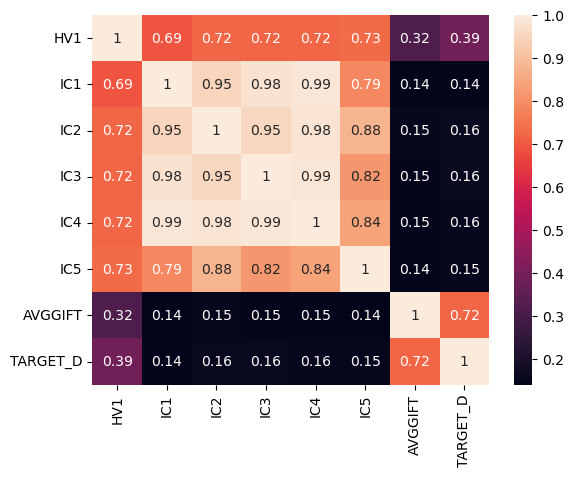

In [120]:
correlations_matrix = reg_data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [121]:
correlations_matrix

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
HV1,1.000000,0.691005,0.723544,0.720057,0.721741,0.732514,0.316638,0.388852
IC1,0.691005,1.000000,0.948398,0.978535,0.988167,0.786123,0.139461,0.144340
IC2,0.723544,0.948398,1.000000,0.952995,0.981665,0.877055,0.154315,0.158349
IC3,0.720057,0.978535,0.952995,1.000000,0.989796,0.818425,0.147167,0.157744
IC4,0.721741,0.988167,0.981665,0.989796,1.000000,0.840399,0.149259,0.155759
IC5,0.732514,0.786123,0.877055,0.818425,0.840399,1.000000,0.144684,0.149836
AVGGIFT,0.316638,0.139461,0.154315,0.147167,0.149259,0.144684,1.000000,0.721364
TARGET_D,0.388852,0.144340,0.158349,0.157744,0.155759,0.149836,0.721364,1.000000


In [122]:
# We can see that there is a very strong positive correlation between IC1 and IC2, IC2 and IC3, IC3 and IC4
# using the concept of multicollinearity, lets drop IC1, IC3 and IC4 and keep IC2 as it has the highest corr wit the target

In [123]:
reduced_data = reg_data.drop(['IC1', 'IC3', 'IC4'],axis=1)
reduced_data.columns

Index(['HV1', 'IC2', 'IC5', 'AVGGIFT', 'TARGET_D'], dtype='object')

In [124]:
from sklearn import linear_model
y = reduced_data['TARGET_D']
X3 = reduced_data.drop(['TARGET_D'], axis=1)
lm3 = linear_model.LinearRegression()
lm3.fit(X3,y)
print(lm3.score(X3,y))
y_pred=lm3.predict(X3)
print(mean_squared_error(y_pred,y))

0.5631524648808386
34.2499902061339


In [125]:
pd.read_csv('regression_data.csv').dtypes

HV1         float64
IC1           int64
IC2           int64
IC3           int64
IC4         float64
IC5           int64
AVGGIFT     float64
TARGET_D    float64
dtype: object

In [128]:
data = pd.read_csv('regression_data.csv')
data

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2000.0,458,453,495,469.0,19217,13.511111,38.0
1,817.0,213,256,240,236.0,8518,12.222222,10.0
2,1866.0,405,423,394,407.0,15709,23.857143,37.0
3,1174.0,268,282,298,283.0,10427,10.400000,12.0
4,3048.0,470,557,562,530.0,31631,8.222222,15.0
...,...,...,...,...,...,...,...,...
995,1837.0,397,409,435,414.0,15850,11.333333,17.0
996,1591.0,409,472,459,447.0,14154,15.000000,23.0
997,632.0,213,246,256,238.0,9892,8.142857,10.0
998,583.0,225,274,278,259.0,11650,3.687500,4.0


In [130]:
from sklearn import linear_model
y = reduced_data['TARGET_D']
X3 = reduced_data.drop(['TARGET_D'], axis=1)
lm3 = linear_model.LinearRegression()
lm3.fit(X3,y)
print(lm3.score(X3,y))
y_pred=lm3.predict(X3)
print(mean_squared_error(y_pred,y))

0.5631524648808386
34.2499902061339


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [150]:
X_train.head()

,HV1,AVGGIFT
29,2512.0,8.928571
535,708.0,10.226923
695,720.0,7.625000
557,1231.0,9.550000
836,1389.0,8.826087


In [151]:
y_train.head()

29      5.0
535    12.0
695     9.0
557    12.0
836    10.0
Name: TARGET_D, dtype: float64

In [152]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [168]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.5244820789331857

In [169]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.6187896614221837

In [166]:
y_test[:5]
plt.show()

In [156]:
y_test[:7]

521    26.0
737     7.0
740    10.0
660    20.0
411     8.0
678    30.0
626    20.0
Name: TARGET_D, dtype: float64

In [157]:
y_test[:13]

521    26.0
737     7.0
740    10.0
660    20.0
411     8.0
678    30.0
626    20.0
513    17.0
859    10.0
136    15.0
811    19.0
76     10.7
636    25.0
Name: TARGET_D, dtype: float64

In [158]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

38.14753855489969

In [159]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

6.176369366780106

In [160]:
y_test.mean()

15.433499999999999

In [164]:
for idx, model in enumerate():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

NameError: name 'model_variations' is not defined